# Phishing Mail Detection

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [12]:
data = pd.read_csv("Phishing_Email.csv")
print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (18650, 3)
   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  


## Data Ratio

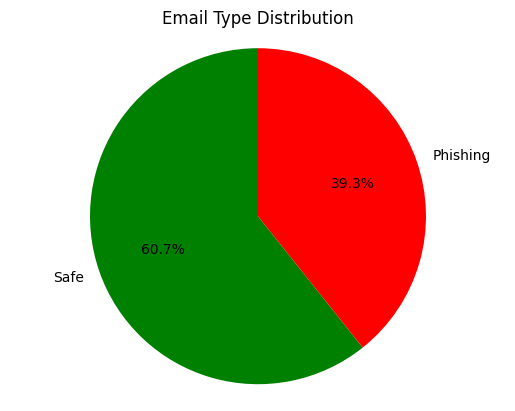

In [13]:
count = data["Email Type"].count()

safe_ratio = data["Email Type"].value_counts()["Safe Email"] / count
phishing_ratio = data["Email Type"].value_counts()["Phishing Email"] / count

plt.pie([safe_ratio, phishing_ratio],
        labels=['Safe', 'Phishing'],
        colors=["green", "red"],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Email Type Distribution')
plt.axis('equal')
plt.show()

## Scatter Plot

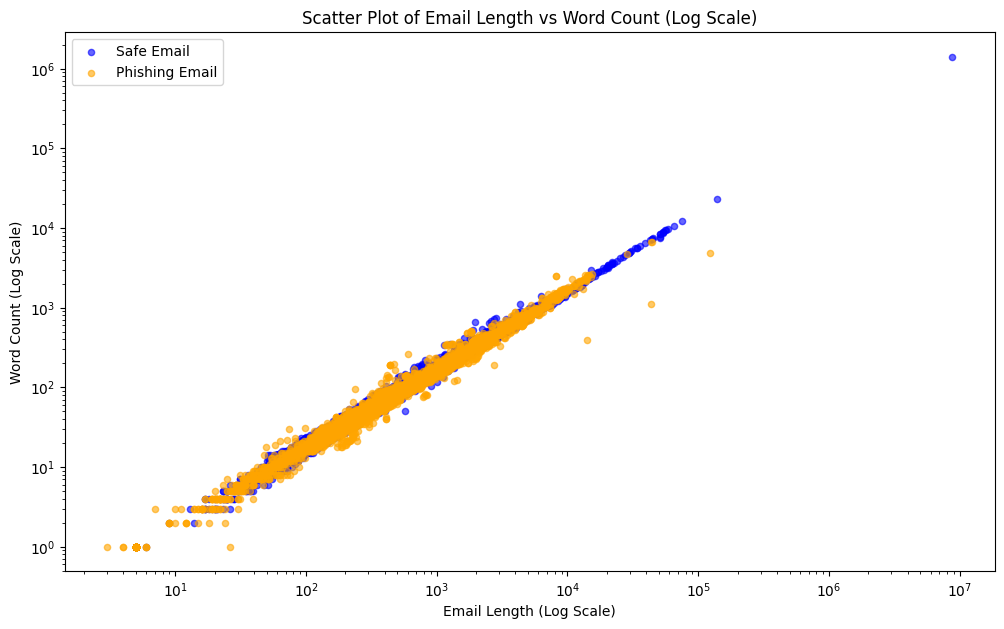

In [ ]:
data["Email Length"] = data["Email Text"].apply(len)
data["Word Count"] = data["Email Text"].apply(lambda x: len(str(x).split()))

data = data[(data["Email Length"] > 0) & (data["Word Count"] > 0)]

plt.figure(figsize=(12,7))
for label, color in [("Safe Email", "blue"), ("Phishing Email", "orange")]:
    subset = data[data["Email Type"] == label]
    plt.scatter(subset["Email Length"], subset["Word Count"],
                c=color, label=label, alpha=0.6, s=20)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Email Length (Log Scale)")
plt.ylabel("Word Count (Log Scale)")
plt.title("Scatter Plot of Email Length vs Word Count (Log Scale)")
plt.legend()
plt.show()

## Remove Missing Values

In [14]:
data.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

Data contains 16 missings. Remove the missing values.

In [15]:
data = data.dropna()

In [16]:
data.isnull().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [17]:
# Remove index column
data = data.drop("Unnamed: 0", axis=1)

## Preprocessing

1. Case folding all text: Conversion to lowercase,
2. Data cleaning by removing unnecessary characters
3. Stopwords removal
4. Stemming: reduced words to their root forms
5. Feature Extraction: TF-IDF
6. Label Encoding


In [18]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stemmer = PorterStemmer()

def casefolding(text):
    return text.lower()

def remove_unnecessary_char(text):
    # Remove email headers and metadata
    text = re.sub(r'^.*?subject:\s*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(?:from|to|cc|bcc|sent|date):.*?\n', ' ', text, flags=re.IGNORECASE)

    text = re.sub(r'<.*?>', ' ', text) # Remove HTML tags if present
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # Remove nonalphanumeric
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

def tokenizing(text):
    text = word_tokenize(text)
    return text

def remove_stopwords(text):
    list_stopwords = stopwords.words('english')
    text = ' '.join(['' if word in list_stopwords else word for word in text])

    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

def stemming(text):
    stemmed_words = []

    for word in text.split(' '):
        stemmed_words.append(stemmer.stem(word))

    return ' '.join(stemmed_words)

def preprocess(data):
    data["Email Text"] = data['Email Text'].apply(casefolding)
    print(f"\nCasefolding Result: ")
    print(data.head())

    data["Email Text"] = data['Email Text'].apply(remove_unnecessary_char)
    print(f"\nRemove Unnecessary Character Result: ")
    print(data.head())

    data['Email Text'] = data['Email Text'].apply(tokenizing)
    print(f"\nTokenization Result: ")
    print(data.head())

    data['Email Text'] = data['Email Text'].apply(remove_stopwords)
    print(f"\nStopwords Removal Result: ")
    print(data.head())

    data['Email Text'] = data['Email Text'].apply(stemming)
    print(f"\nStemming Result: ")
    print(data.head())

    return data["Email Text"]

data['Email Text'] = preprocess(data)
data.to_csv('Preprocessed_Phishing_Email.csv', index=False)

<>:24: SyntaxWarning: invalid escape sequence '\.'
<>:24: SyntaxWarning: invalid escape sequence '\.'
/var/folders/gv/0ps3ktdn6m1gtvgm5pcgdyg40000gn/T/ipykernel_1384/1053185672.py:24: SyntaxWarning: invalid escape sequence '\.'
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ',text) # Remove every URL
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/faishalfarizhidayatullah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/faishalfarizhidayatullah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/faishalfarizhidayatullah/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Casefolding Result: 
                                          Email Text      Email Type
0  re : 6 . 1100 , disc : uniformitarianism , re ...      Safe Email
1  the other side of * galicismos * * galicismo *...      Safe Email
2  re : equistar deal tickets are you still avail...      Safe Email
3  \nhello i am your hot lil horny toy.\n    i am...  Phishing Email
4  software at incredibly low prices ( 86 % lower...  Phishing Email

Remove Unnecessary Character Result: 
                                          Email Text      Email Type
0  re 6 1100 disc uniformitarianism re 1086 sex l...      Safe Email
1  the other side of galicismos galicismo is a sp...      Safe Email
2  re equistar deal tickets are you still availab...      Safe Email
3   hello i am your hot lil horny toy i am the on...  Phishing Email
4  software at incredibly low prices 86 lower dra...  Phishing Email

Tokenization Result: 
                                          Email Text      Email Type
0  [re, 6, 1100, di

In [19]:
data.to_csv('Preprocessed_Phishing_Email.csv', index=False)

In [29]:
data_clean = pd.read_csv("Preprocessed_Phishing_Email.csv")
data_clean.head(5)

,Email Text,Email Type
0,6 1100 disc uniformitarian 1086 sex lang dick ...,Safe Email
1,side galicismo galicismo spanish term name imp...,Safe Email
2,equistar deal ticket still avail assist robert...,Safe Email
3,hello hot lil horni toy one dream open mind pe...,Phishing Email
4,softwar incred low price 86 lower draperi seve...,Phishing Email


## Feature Extraction

In [30]:
data_clean = data_clean.astype({ "Email Type": "category" })
data_clean = data_clean.astype({ "Email Text": "string" })

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean["Email Text"].astype('U'))

# Output tfidf result
# Get feature names
feature_names = tf.get_feature_names_out()

# Get TF-IDF values for each feature
tfidf_values = text_tf.toarray()

# Create a DataFrame to store the results
tfidf_df = pd.DataFrame(data=tfidf_values, columns=feature_names)

print(tfidf_df)

        00  000  0000  000000  00000000  000000000  \
0      0.0  0.0   0.0     0.0       0.0        0.0   
1      0.0  0.0   0.0     0.0       0.0        0.0   
2      0.0  0.0   0.0     0.0       0.0        0.0   
3      0.0  0.0   0.0     0.0       0.0        0.0   
4      0.0  0.0   0.0     0.0       0.0        0.0   
...    ...  ...   ...     ...       ...        ...   
18629  0.0  0.0   0.0     0.0       0.0        0.0   
18630  0.0  0.0   0.0     0.0       0.0        0.0   
18631  0.0  0.0   0.0     0.0       0.0        0.0   
18632  0.0  0.0   0.0     0.0       0.0        0.0   
18633  0.0  0.0   0.0     0.0       0.0        0.0   

       000000000000000000000000000  \
0                              0.0   
1                              0.0   
2                              0.0   
3                              0.0   
4                              0.0   
...                            ...   
18629                          0.0   
18630                          0.0   
18631    

## Label Encoding

In [31]:
mapping = {'Safe Email': 0, 'Phishing Email': 1}

data_clean['Email Type'] = data_clean['Email Type'].map(mapping)
data_clean.head()

,Email Text,Email Type
0,6 1100 disc uniformitarian 1086 sex lang dick ...,0
1,side galicismo galicismo spanish term name imp...,0
2,equistar deal ticket still avail assist robert...,0
3,hello hot lil horni toy one dream open mind pe...,1
4,softwar incred low price 86 lower draperi seve...,1


## Visualisasi Data

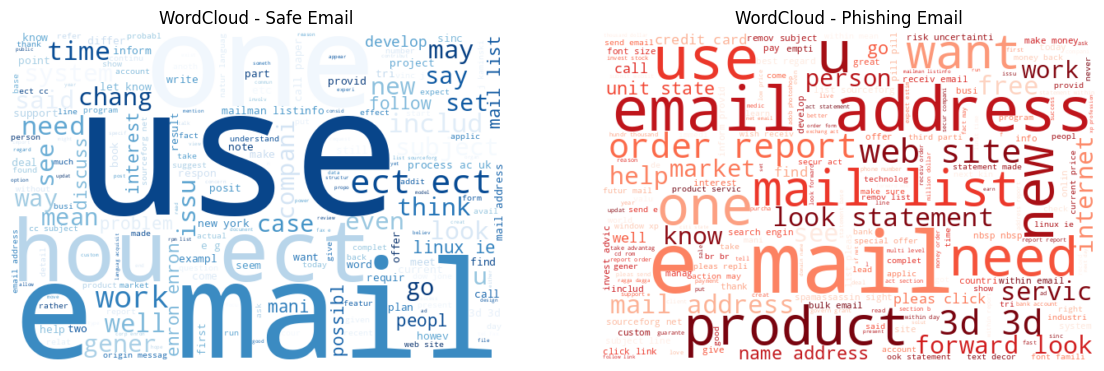

In [ ]:
from wordcloud import WordCloud
from nltk.probability import FreqDist
safe_text = " ".join(data[data["Email Type"]=="Safe Email"]["Email Text"].dropna().tolist())
phish_text = " ".join(data[data["Email Type"]=="Phishing Email"]["Email Text"].dropna().tolist())

wc_safe = WordCloud(width=600, height=400, background_color="white", colormap="Blues").generate(safe_text)
wc_phish = WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(phish_text)

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].imshow(wc_safe, interpolation="bilinear"); ax[0].set_title("WordCloud - Safe Email"); ax[0].axis("off")
ax[1].imshow(wc_phish, interpolation="bilinear"); ax[1].set_title("WordCloud - Phishing Email"); ax[1].axis("off")
plt.show()

/tmp/ipython-input-4074992841.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette=color)


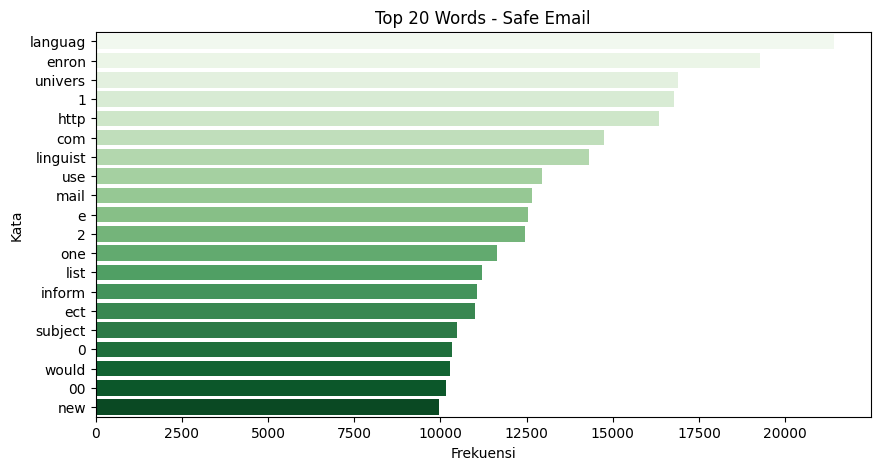

/tmp/ipython-input-4074992841.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette=color)


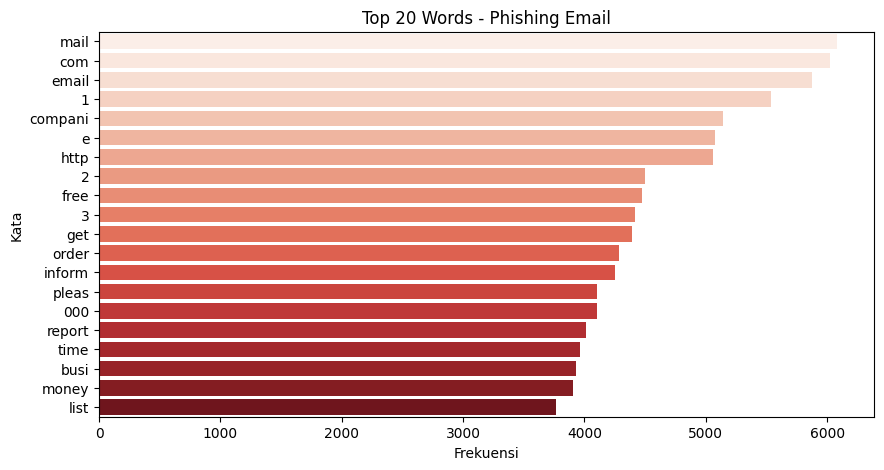

In [ ]:
import seaborn as sns
def plot_top_words(texts, label, color):
    all_words = []
    for txt in texts:
        tokens = nltk.word_tokenize(str(txt))
        all_words.extend(tokens)

    freq_dist = FreqDist(all_words)
    top_words = freq_dist.most_common(20)

    words = [w for w, _ in top_words]
    counts = [c for _, c in top_words]

    plt.figure(figsize=(10,5))
    sns.barplot(x=counts, y=words, palette=color)
    plt.title(f"Top 20 Words - {label}")
    plt.xlabel("Frekuensi")
    plt.ylabel("Kata")
    plt.show()

safe_emails = data[data["Email Type"]=="Safe Email"]["Email Text"]
plot_top_words(safe_emails, "Safe Email", "Greens")

phishing_emails = data[data["Email Type"]=="Phishing Email"]["Email Text"]
plot_top_words(phishing_emails, "Phishing Email", "Reds")

## Splitting Data

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean["Email Type"], test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)  # Shape of the feature matrix for training data
print("X_test shape:", X_test.shape)    # Shape of the feature matrix for testing data
print("y_train shape:", y_train.shape)  # Shape of the target variable for training data
print("y_test shape:", y_test.shape)    # Shape of the target variable for testing data

X_train shape: (14907, 131490)
X_test shape: (3727, 131490)
y_train shape: (14907,)
y_test shape: (3727,)


## SVM Model

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

c_params = [0.1, 1, 10, 100, 1000]
kernel_params = ["linear", "poly", "rbf"]

trial_number_SVM = 0
accuracies_SVM = []
recalls_SVM = []
precisions_SVM = []
f1_scores_SVM = []
search_data_SVM = []

for c_param in c_params:
    for kernel_param in kernel_params:
        trial_number_SVM += 1
        clf = svm.SVC(C=c_param, kernel=kernel_param)
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_predict)
        recall = recall_score(y_test, y_predict)
        precision = precision_score(y_test, y_predict)
        f1 = f1_score(y_test, y_predict)

        tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
        specificity = tn / (tn + fp)

        accuracies_SVM.append(accuracy)
        recalls_SVM.append(recall)
        precisions_SVM.append(precision)
        f1_scores_SVM.append(f1)
        search_data_SVM.append(str(c_param) + "-" + kernel_param)

        print(
            trial_number_SVM,
            "Parameters:", "C:", c_param, "kernel:", kernel_param, "-",
            "Accuracy:", accuracy,
            "Precision:", precision,
            "Recall:", recall,
            "F1:", f1
        )


1 Parameters: C: 0.1 kernel: linear - Accuracy: 0.9627045881405957 Precision: 0.9527248850952068 Recall: 0.955862977602108 F1: 0.9542913515291023
2 Parameters: C: 0.1 kernel: poly - Accuracy: 0.6372417493962973 Precision: 0.8487394957983193 Recall: 0.13306982872200263 F1: 0.23006833712984054
3 Parameters: C: 0.1 kernel: rbf - Accuracy: 0.894821572310169 Precision: 0.9607201309328969 Recall: 0.7733860342555995 F1: 0.8569343065693431
4 Parameters: C: 1 kernel: linear - Accuracy: 0.9750469546552186 Precision: 0.9541108986615678 Recall: 0.9861660079051383 F1: 0.9698736637512148
5 Parameters: C: 1 kernel: poly - Accuracy: 0.8526965387711296 Precision: 0.9645254074784276 Recall: 0.6627140974967062 F1: 0.7856306130417805
6 Parameters: C: 1 kernel: rbf - Accuracy: 0.9758518916018245 Precision: 0.9571062740076824 Recall: 0.9848484848484849 F1: 0.9707792207792207
7 Parameters: C: 10 kernel: linear - Accuracy: 0.9739737053930776 Precision: 0.9522597071928708 Recall: 0.9855072463768116 F1: 0.96859

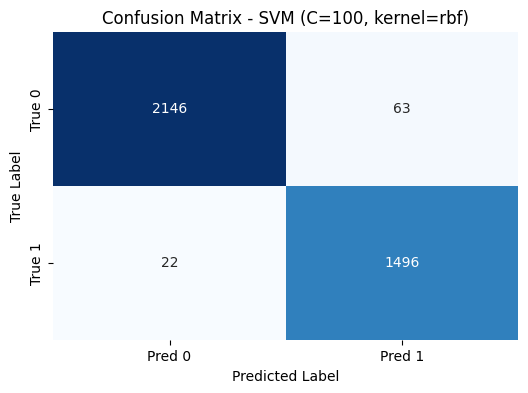

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix

# Train ulang dengan parameter terbaik
best_svm = svm.SVC(C=100, kernel="rbf")
best_svm.fit(X_train, y_train)
y_pred_best = best_svm.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM (C=100, kernel=rbf)")
plt.show()


## XGBoost Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define hyperparameter grid
n_estimators_params = [50, 100, 200]
max_depth_params = [3, 5, 7]

trial_number_xgboost = 0
accuracies_xgboost = []
recalls_xgboost = []
precisions_xgboost = []
f1_scores_xgboost = []
search_data_xgboost = []

for n_estimators in n_estimators_params:
    for max_depth in max_depth_params:
        trial_number_xgboost += 1
        clf = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            use_label_encoder=False,
            eval_metric='logloss'
        )
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_predict)
        recall = recall_score(y_test, y_predict)
        precision = precision_score(y_test, y_predict)
        f1 = f1_score(y_test, y_predict)

        accuracies_xgboost.append(accuracy)
        recalls_xgboost.append(recall)
        precisions_xgboost.append(precision)
        f1_scores_xgboost.append(f1)
        search_data_xgboost.append(f"{n_estimators}-{max_depth}")

        print(
            trial_number_xgboost,
            "Parameters:", "n_estimators:", n_estimators, "max_depth:", max_depth, "-",
            "Accuracy:", accuracy,
            "Precision:", precision,
            "Recall:", recall,
            "F1:", f1
        )

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:54:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


1 Parameters: n_estimators: 50 max_depth: 3 - Accuracy: 0.9377515427958143 Precision: 0.8935128518971848 Recall: 0.9617918313570487 F1: 0.9263959390862944


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:54:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


2 Parameters: n_estimators: 50 max_depth: 5 - Accuracy: 0.9519720955191844 Precision: 0.9125077017868145 Recall: 0.9756258234519104 F1: 0.9430117796879974


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:55:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


3 Parameters: n_estimators: 50 max_depth: 7 - Accuracy: 0.9581432787764959 Precision: 0.9229813664596274 Recall: 0.9789196310935442 F1: 0.9501278772378516


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:56:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


4 Parameters: n_estimators: 100 max_depth: 3 - Accuracy: 0.9543869063590019 Precision: 0.9160493827160494 Recall: 0.9776021080368906 F1: 0.9458253664754621


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:56:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


5 Parameters: n_estimators: 100 max_depth: 5 - Accuracy: 0.9613630265629193 Precision: 0.9304511278195489 Recall: 0.9782608695652174 F1: 0.953757225433526


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:57:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


6 Parameters: n_estimators: 100 max_depth: 7 - Accuracy: 0.9651193989804132 Precision: 0.9370277078085643 Recall: 0.9802371541501976 F1: 0.9581455247907277


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:58:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


7 Parameters: n_estimators: 200 max_depth: 3 - Accuracy: 0.9632412127716662 Precision: 0.9323731997495304 Recall: 0.9808959156785244 F1: 0.9560192616372392


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:58:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


8 Parameters: n_estimators: 200 max_depth: 5 - Accuracy: 0.9659243359270191 Precision: 0.936050156739812 Recall: 0.9835309617918313 F1: 0.9592033408287826


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:00:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


9 Parameters: n_estimators: 200 max_depth: 7 - Accuracy: 0.9667292728736249 Precision: 0.9405815423514539 Recall: 0.9802371541501976 F1: 0.96


/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:13:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


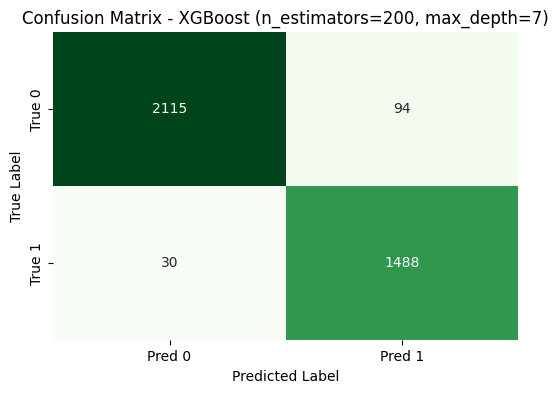

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Train ulang dengan parameter terbaik
best_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_test)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost (n_estimators=200, max_depth=7)")
plt.show()

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define hyperparameter grid for RandomForest
n_estimators_params = [50, 100, 200]
max_depth_params = [3, 5, 7]

trial_number_rf = 0
accuracies_rf = []
recalls_rf = []
precisions_rf = []
f1_scores_rf = []
search_data_rf = []

for n_estimators in n_estimators_params:
    for max_depth in max_depth_params:
        trial_number_rf += 1
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_predict)
        recall = recall_score(y_test, y_predict, average='binary')
        precision = precision_score(y_test, y_predict, average='binary')
        f1 = f1_score(y_test, y_predict, average='binary')

        accuracies_rf.append(accuracy)
        recalls_rf.append(recall)
        precisions_rf.append(precision)
        f1_scores_rf.append(f1)
        search_data_rf.append(f"n_estimators-{n_estimators}_max_depth-{max_depth}")

        print(trial_number_rf, "Parameters:", "n_estimators:", n_estimators, "max_depth:", max_depth,
              "-", "Accuracy:", accuracy, "Recall:", recall, "Precision:", precision, "F1-score:", f1)

1 Parameters: n_estimators: 50 max_depth: 3 - Accuracy: 0.5945800912261873 Recall: 0.00461133069828722 Precision: 1.0 F1-score: 0.009180327868852459
2 Parameters: n_estimators: 50 max_depth: 5 - Accuracy: 0.6230211966729273 Recall: 0.07444005270092227 Precision: 1.0 F1-score: 0.13856529736358061
3 Parameters: n_estimators: 50 max_depth: 7 - Accuracy: 0.6579017976925141 Recall: 0.1600790513833992 Precision: 1.0 F1-score: 0.27597955706984667
4 Parameters: n_estimators: 100 max_depth: 3 - Accuracy: 0.5945800912261873 Recall: 0.00461133069828722 Precision: 1.0 F1-score: 0.009180327868852459
5 Parameters: n_estimators: 100 max_depth: 5 - Accuracy: 0.6090689562650926 Recall: 0.04018445322793149 Precision: 1.0 F1-score: 0.07726409119696011
6 Parameters: n_estimators: 100 max_depth: 7 - Accuracy: 0.6525355513818084 Recall: 0.1469038208168643 Precision: 1.0 F1-score: 0.25617461229178634
7 Parameters: n_estimators: 200 max_depth: 3 - Accuracy: 0.5959216528038637 Recall: 0.007905138339920948 Prec

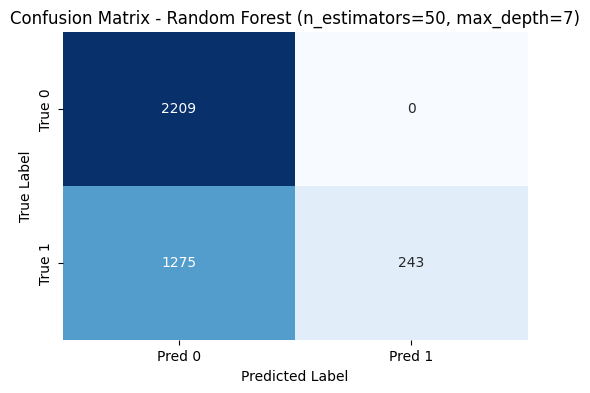

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Train ulang dengan parameter terbaik Random Forest
best_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=7,
    random_state=42
)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_best_rf)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (n_estimators=50, max_depth=7)")
plt.show()

## Multinomial-Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define hyperparameter grid for MultinomialNB
alpha_params = [0.1, 0.5, 1.0]

trial_number_nb = 0
accuracies_nb = []
recalls_nb = []
precisions_nb = []
f1_scores_nb = []
search_data_nb = []

for alpha in alpha_params:
    trial_number_nb += 1
    clf = MultinomialNB(alpha=alpha)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)

    accuracies_nb.append(accuracy)
    recalls_nb.append(recall)
    precisions_nb.append(precision)
    f1_scores_nb.append(f1)
    search_data_nb.append(f"alpha-{alpha}")

    print(trial_number_nb, "Parameters:", "alpha:", alpha,
          "-", "Accuracy:", accuracy, "Recall:", recall, "Precision:", precision, "F1-score:", f1)

1 Parameters: alpha: 0.1 - Accuracy: 0.9694123960289778 Recall: 0.961133069828722 Precision: 0.9636723910171731 F1-score: 0.962401055408971
2 Parameters: alpha: 0.5 - Accuracy: 0.9433861014220553 Recall: 0.88866930171278 Precision: 0.9698058950395398 F1-score: 0.927466483327604
3 Parameters: alpha: 1.0 - Accuracy: 0.9117252481888919 Recall: 0.8089591567852438 Precision: 0.9692186266771902 F1-score: 0.881867145421903


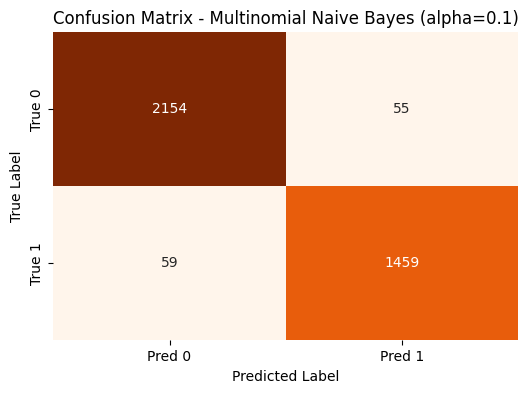

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# Train ulang dengan parameter terbaik
best_mnb = MultinomialNB(alpha=0.1)
best_mnb.fit(X_train, y_train)
y_pred_best_mnb = best_mnb.predict(X_test)

# Confusion Matrix
cm_mnb = confusion_matrix(y_test, y_pred_best_mnb)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mnb, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Multinomial Naive Bayes (alpha=0.1)")
plt.show()


## Ensemble Learning Model (SVM + XGBoost -> Logistic Regression)
Dari SVM dan XGBoost pilih model dengan F1 Score terbagus, lalu gunakan untuk stacking ensemble learning

Stacking Results:
Accuracy : 0.9742420177086129
Precision: 0.9569408740359897
Recall   : 0.9808959156785244
F1 Score : 0.9687703318152244

Confusion Matrix:
 [[2142   67]
 [  29 1489]]


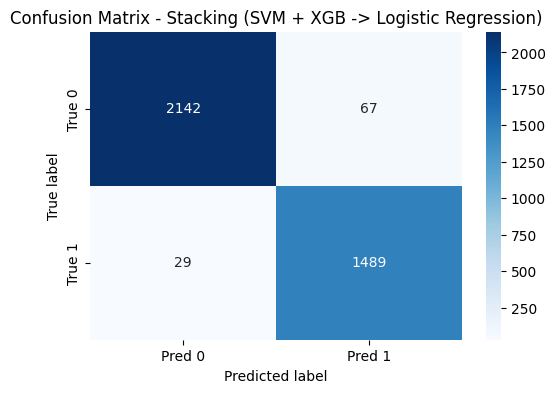

In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Base learners
estimators = [
    ("svm", svm.SVC(probability=True, kernel="rbf", C=10)),
    ("xgb", XGBClassifier(n_estimators=200, max_depth=7, eval_metric="logloss"))
]

# Meta learner
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    stack_method="predict_proba",
    passthrough=False,
    cv=5
)

# Train model
stacking_clf.fit(X_train, y_train)

# Predict
y_pred = stacking_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Stacking Results:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# (Optional) Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix - Stacking (SVM + XGB -> Logistic Regression)")
plt.show()


Stacking Results:
Accuracy : 0.9771934531795009
Precision: 0.9595894804361771
Recall   : 0.9855072463768116
F1 Score : 0.9723756906077348

Confusion Matrix:
 [[2146   63]
 [  22 1496]]


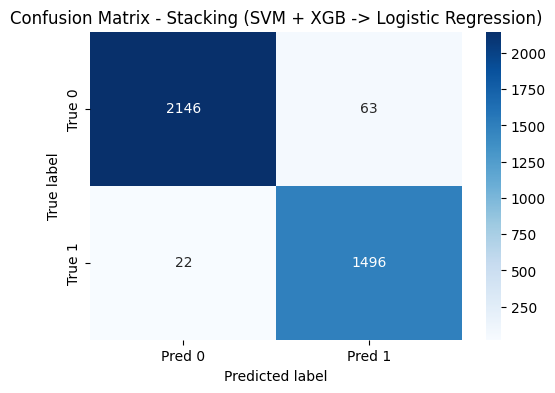

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Base learners
estimators = [
    ("svm", svm.SVC(probability=True, kernel="rbf", C=100)),
    ("xgb", XGBClassifier(n_estimators=200, max_depth=7, eval_metric="logloss"))
]

# Meta learner
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    stack_method="predict_proba",
    passthrough=True,
    cv=5
)

# Train model
stacking_clf.fit(X_train, y_train)

# Predict
y_pred = stacking_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Stacking Results:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# (Optional) Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix - Stacking (SVM + XGB -> Logistic Regression)")
plt.show()
